In [25]:
import os 
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [26]:
shapes=[]
for filename in os.listdir('./'):
    if(filename[-3:]=='csv'):
        df=pd.read_csv(filename)
        #print(len(df['x-coordinates'].tolist()))
        shapes.append(df['x-coordinates'].tolist())
        shapes.append(df['y-coordinates'].tolist())

curvy


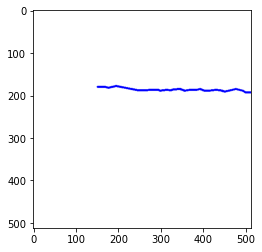

triang


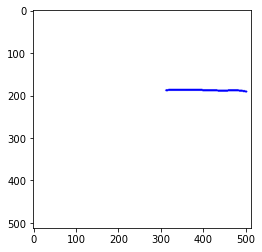

boxcar


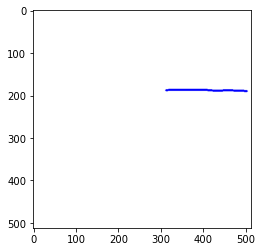

hamming


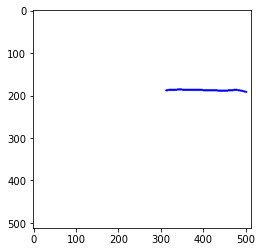

bohman


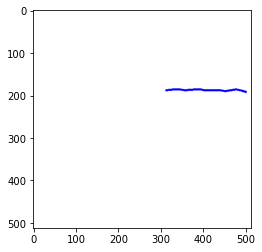

parzen


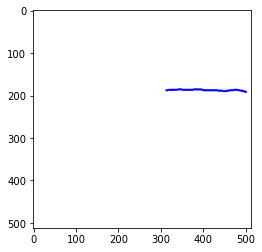

curvy


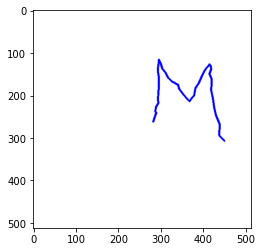

triang


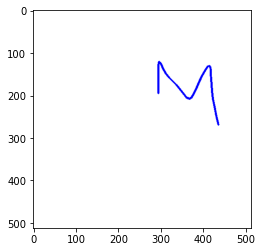

boxcar


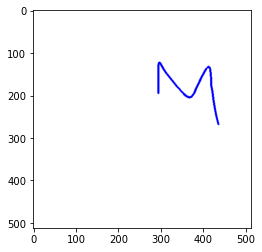

hamming


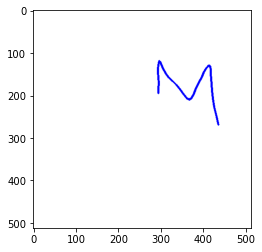

bohman


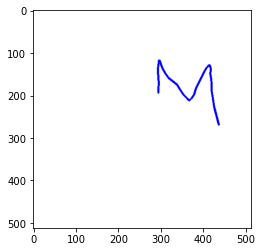

parzen


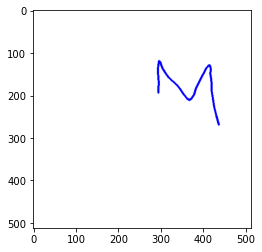

curvy


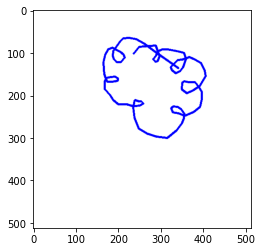

triang


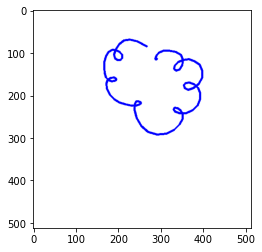

boxcar


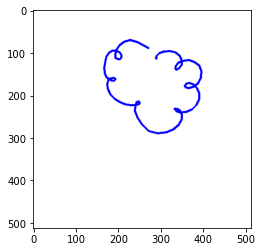

hamming


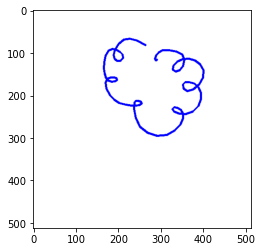

bohman


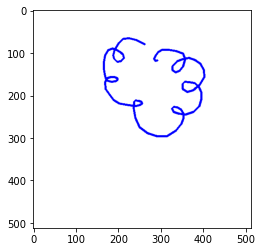

parzen


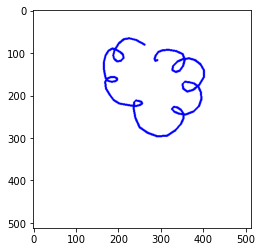

curvy


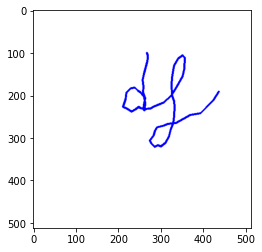

triang


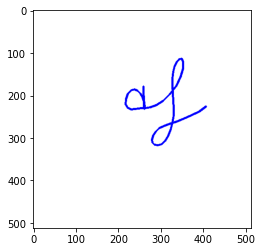

boxcar


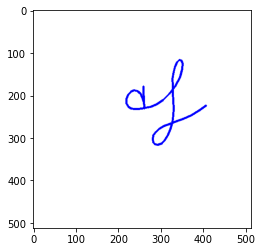

hamming


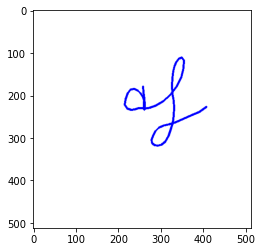

bohman


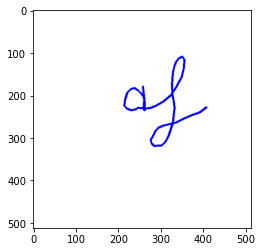

parzen


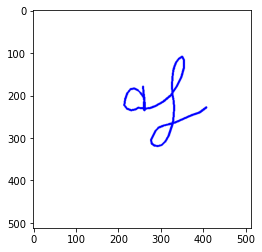

curvy


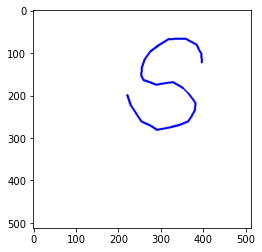

triang


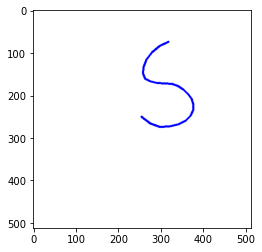

boxcar


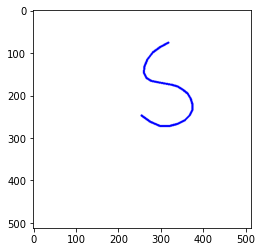

hamming


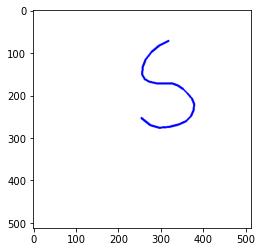

bohman


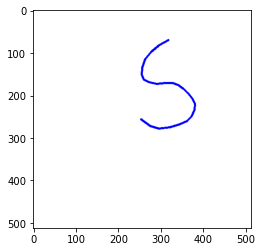

parzen


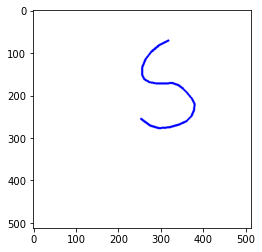

curvy


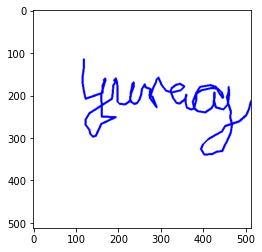

triang


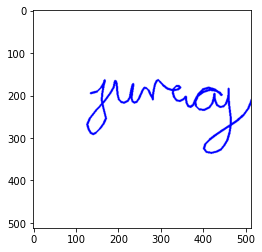

boxcar


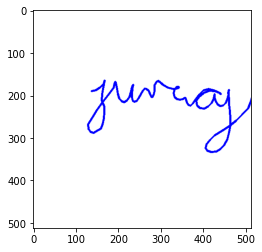

hamming


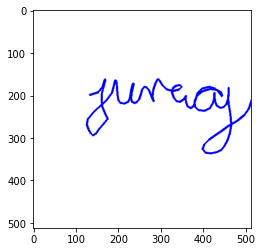

bohman


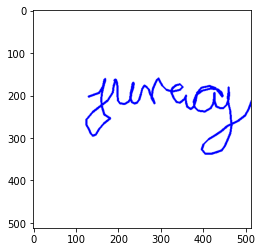

parzen


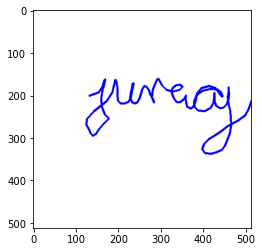

curvy


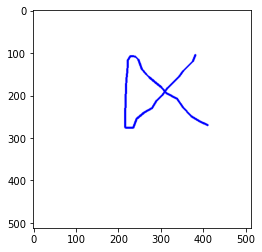

triang


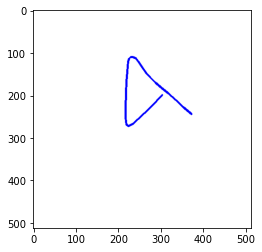

boxcar


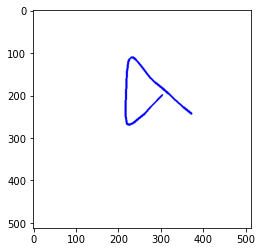

hamming


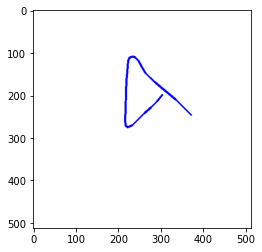

bohman


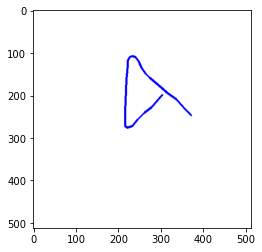

parzen


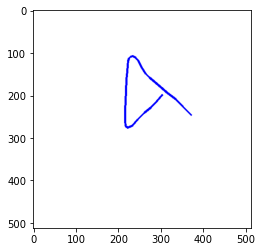

curvy


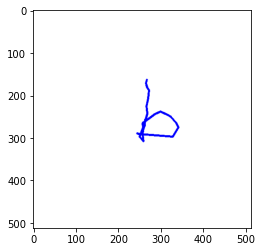

triang


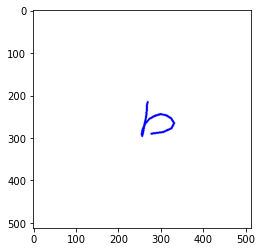

boxcar


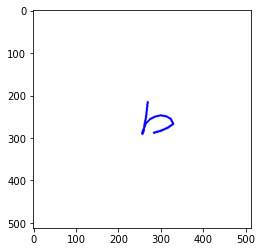

hamming


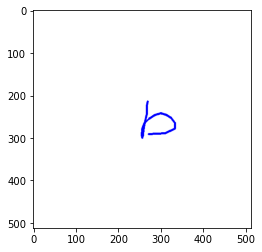

bohman


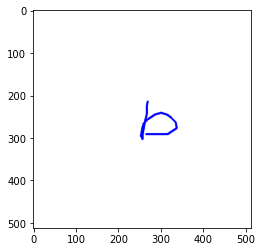

parzen


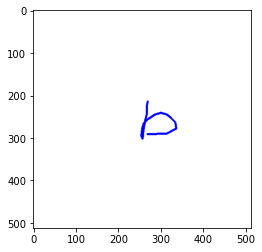

curvy


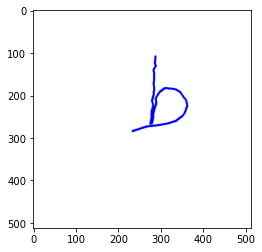

triang


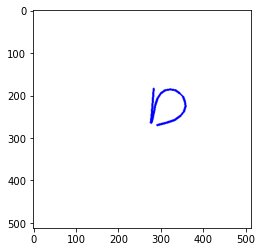

boxcar


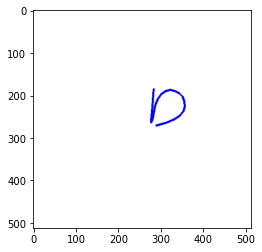

hamming


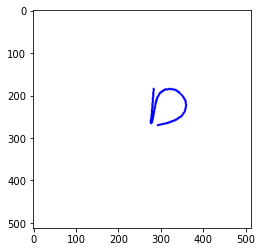

bohman


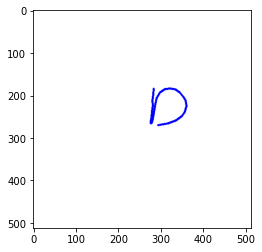

parzen


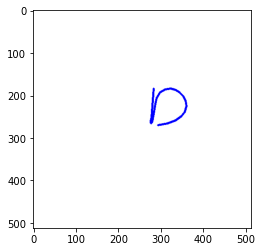

curvy


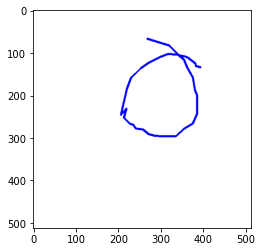

triang


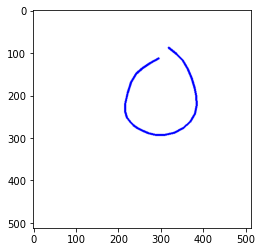

boxcar


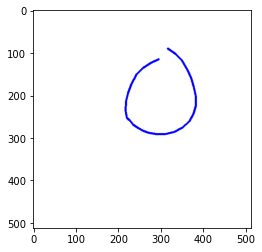

hamming


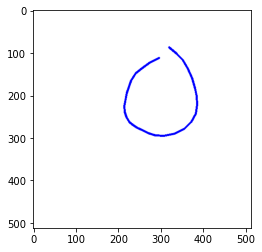

bohman


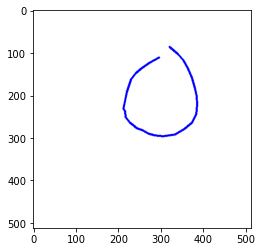

parzen


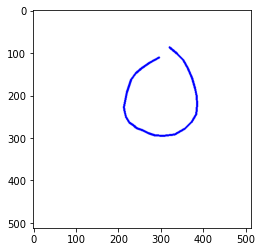

curvy


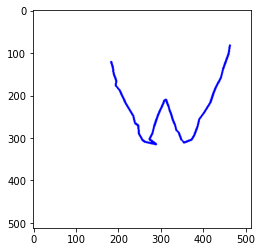

triang


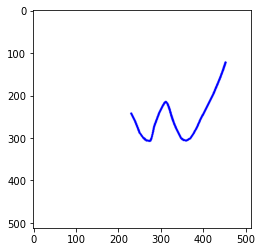

boxcar


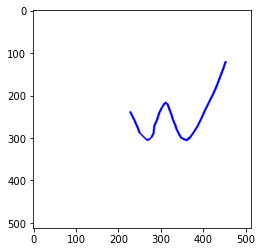

hamming


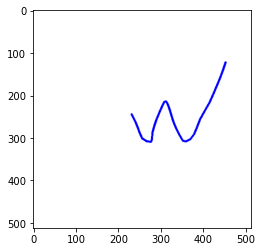

bohman


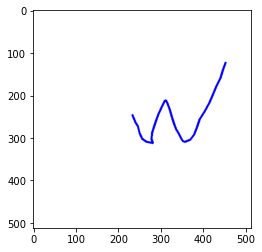

parzen


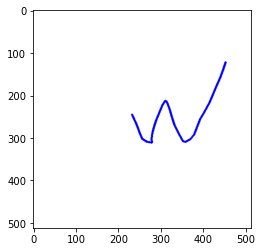

curvy


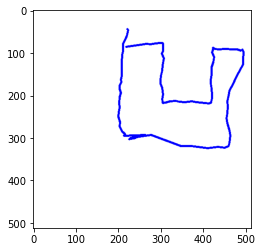

triang


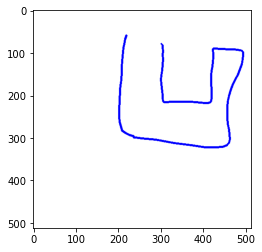

boxcar


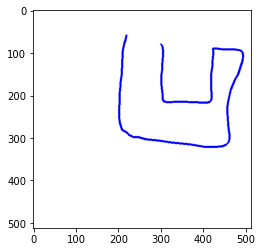

hamming


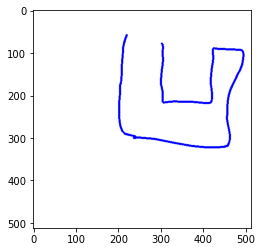

bohman


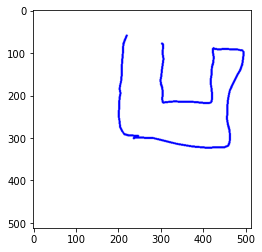

parzen


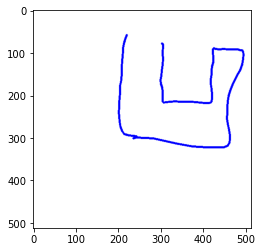

In [58]:
plots=[]
plots_sm=[]
sm_techniques=['triang','boxcar','hamming','bohman','parzen']
for i in range(0,len(shapes),2):
    x_coordinates=shapes[i]
    y_coordinates=shapes[i+1]
    blank_image = 255 * np.ones(shape=[512, 512, 3], dtype=np.uint8)
    for j in range(1,len(x_coordinates)):
        cv2.line(blank_image,(int(x_coordinates[j]),int(y_coordinates[j])),(int(x_coordinates[j-1]),int(y_coordinates[j-1])),(255,0,0),3)
    plots.append(blank_image)
    xsr=pd.Series(shapes[i])
    ysr=pd.Series(shapes[i+1])
    plots_sm_t=[]
    for technique in sm_techniques:
        blank_image_sm = 255 * np.ones(shape=[512, 512, 3], dtype=np.uint8)
        x_coordinates_sm=xsr.rolling(5, win_type =technique).mean()
        y_coordinates_sm=ysr.rolling(5, win_type =technique).mean()
        x_coordinates_sm=x_coordinates_sm[9:].tolist()
        y_coordinates_sm=y_coordinates_sm[9:].tolist()
        for j in range(1,len(x_coordinates_sm)):
            cv2.line(blank_image_sm,(int(x_coordinates_sm[j]),int(y_coordinates_sm[j])),(int(x_coordinates_sm[j-1]),int(y_coordinates_sm[j-1])),(255,0,0),3)
        plots_sm_t.append(blank_image_sm)
    plots_sm.append(plots_sm_t)
for i in range(0,len(plots)):
    plot=plots[i]
    print('curvy')
    plt.imshow(plot[:,:,::-1])
    plt.show()
    
    plot_sm_t=plots_sm[i]
    for j in range(0,len(plot_sm_t)):
        print(sm_techniques[j])
        plot_sm_c=plot_sm_t[j]
        plt.imshow(plot_sm_c[:,:,::-1])
        plt.show()